In [1]:
import torch
from torch.utils.data import Subset
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from data_utils import split_non_iid_dataset,read_log
from federated_learning_system import Server, n_clients, ALPHA,fraction_client
from model import Model

# 检查CUDA是否可用
device = 'cuda' if torch.cuda.is_available() else 'cpu'



# EMNIST.class_to_idx是一个存放了映射的字典，可以帮助我们获得labels到字符的映射。
# for i, char in data.class_to_idx.items():
#     print(f"{i}: {char}")


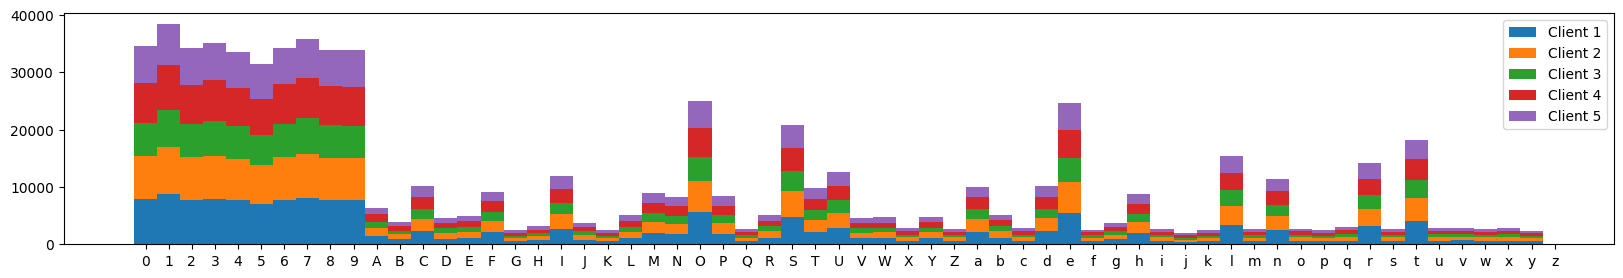

In [2]:
train_dataset = datasets.EMNIST(root='.', split='byclass', download=True, train=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation((0, 360))
]))

labels = train_dataset.targets.numpy()
index = np.random.permutation(len(train_dataset))
train_index=index
train_index_by_client = split_non_iid_dataset(labels=labels, index=train_index, alpha=ALPHA, n_clients=n_clients)
train_labels = [labels[idx] for idx in train_index_by_client]
train_datasets = [Subset(train_dataset, idx) for idx in train_index_by_client]

test_dataset = datasets.EMNIST(root='.', split='byclass', download=True, train=False,
                               transform=transforms.Compose([transforms.ToTensor()]))

mapp = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
                 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
                 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
                 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
                 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

plt.figure(figsize=(20, 3))
# train_labels是有n_clients个list的列表
plt.hist(train_labels,
         bins=np.arange(len(mapp)) - 0.5,
         stacked=True,
         label=["Client {}".format(i + 1) for i in range(n_clients)])
plt.xticks(ticks=np.arange(62), labels=mapp)
plt.legend()
plt.show()

In [3]:
n_rounds=600
server = Server(Model, test_dataset, n_rounds, fraction_client, *train_datasets)

In [ ]:
train_loss_list, train_accuracy_list, evaluate_loss_list, evaluate_accuracy_list = [], [], [], []
server.run(train_loss_list, train_accuracy_list, evaluate_loss_list, evaluate_accuracy_list,301)

Round: 301
Train_loss: 1.4284   Train_accuracy: 59.6164%
Evaluate_loss: 1.2873   Evaluate_accuracy: 62.9761%

Round: 302
Train_loss: 1.4264   Train_accuracy: 59.6519%
Evaluate_loss: 1.2857   Evaluate_accuracy: 63.0162%

Round: 303
Train_loss: 1.4248   Train_accuracy: 59.7115%
Evaluate_loss: 1.2847   Evaluate_accuracy: 63.0197%

Round: 304
Train_loss: 1.4236   Train_accuracy: 59.7161%
Evaluate_loss: 1.2822   Evaluate_accuracy: 63.1086%

Round: 305
Train_loss: 1.4227   Train_accuracy: 59.7326%
Evaluate_loss: 1.2815   Evaluate_accuracy: 63.0981%

Round: 306
Train_loss: 1.4206   Train_accuracy: 59.7912%
Evaluate_loss: 1.2808   Evaluate_accuracy: 63.1147%

Round: 307
Train_loss: 1.4189   Train_accuracy: 59.7883%
Evaluate_loss: 1.2787   Evaluate_accuracy: 63.1627%

Round: 308
Train_loss: 1.4164   Train_accuracy: 59.8277%
Evaluate_loss: 1.2776   Evaluate_accuracy: 63.1845%

Round: 309
Train_loss: 1.4163   Train_accuracy: 59.8837%
Evaluate_loss: 1.2746   Evaluate_accuracy: 63.2725%

Round: 310

In [ ]:
import matplotlib.pyplot as plt
from  data_utils import  read_log

train_loss_list, train_accuracy_list, evaluate_loss_list, evaluate_accuracy_list=read_log()
length=len(train_loss_list)
r = range(1, length + 1)
rx=range(1,length+1,50)
plt.figure(figsize=(20, 4))

fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax0.plot(r, train_loss_list, label="train")
ax0.plot(r, evaluate_loss_list, label="evaluate")
ax0.set_title('Learning Curves')
ax0.legend(loc="upper right")
ax0.set_ylabel('Loss')
ax1.plot(r, train_accuracy_list, label="train")
ax1.plot(r, evaluate_accuracy_list, label="evaluate")
ax1.legend(loc="upper right")
ax1.set_ylabel('Accuracy(%)')
ax1.set_xlabel('Round')
ax1.set_xticks(rx)
plt.show()